In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 1
2023-08-03 21:00:02.358452


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(6026.6948)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.5972)tensor(8.8596)tensor(4.9213)tensor(5.9080)tensor(4.8541)tensor(2.8925)tensor(4.4714)tensor(3.7871)tensor(6.5219)tensor(4.6709)tensor(4.6850)tensor(4.8074)tensor(9.8899)tensor(4.5292)tensor(6.2936)tensor(4.3625)tensor(6.4115)tensor(4.1730)tensor(6.4094)tensor(3.4600)tensor(3.5263)tensor(4.5102)tensor(7.8791)tensor(4.7973)tensor(5.6484)tensor(5.4888)tensor(5.8821)tensor(11.0964)tensor(3.9974)tensor(4.3530)tensor(5.9977)tensor(4.8044)tensor(4.1409)tensor(4.7079)tensor(7.9243)tensor(3.6432)tensor(11.4574)tensor(4.1199)tensor(4.5929)tensor(4.8191)tensor(3.8387)tensor(2.7543)tensor(3.8911)tensor(3.9825)tensor(3.3087)tensor(4.1304)tensor(5.9478)tensor(3.5978)tensor(6.2912)tensor(3.4662)tensor(4.8284)tensor(4.7746)tensor(2.5131)tensor(4.5803)tensor(6.9755)tensor(3.5450)tensor(4.5407)tensor(2.8308)tensor(8.4173)tensor(5.2217)tensor(7.0983)tensor(4.1398)tensor(3.1101)tensor(6.5179)tensor(4.6859)tensor(5.7716)tensor(8.5035)tensor(6.0332)tensor(4.1769)tensor(6.2409)tensor(6.0948)tens

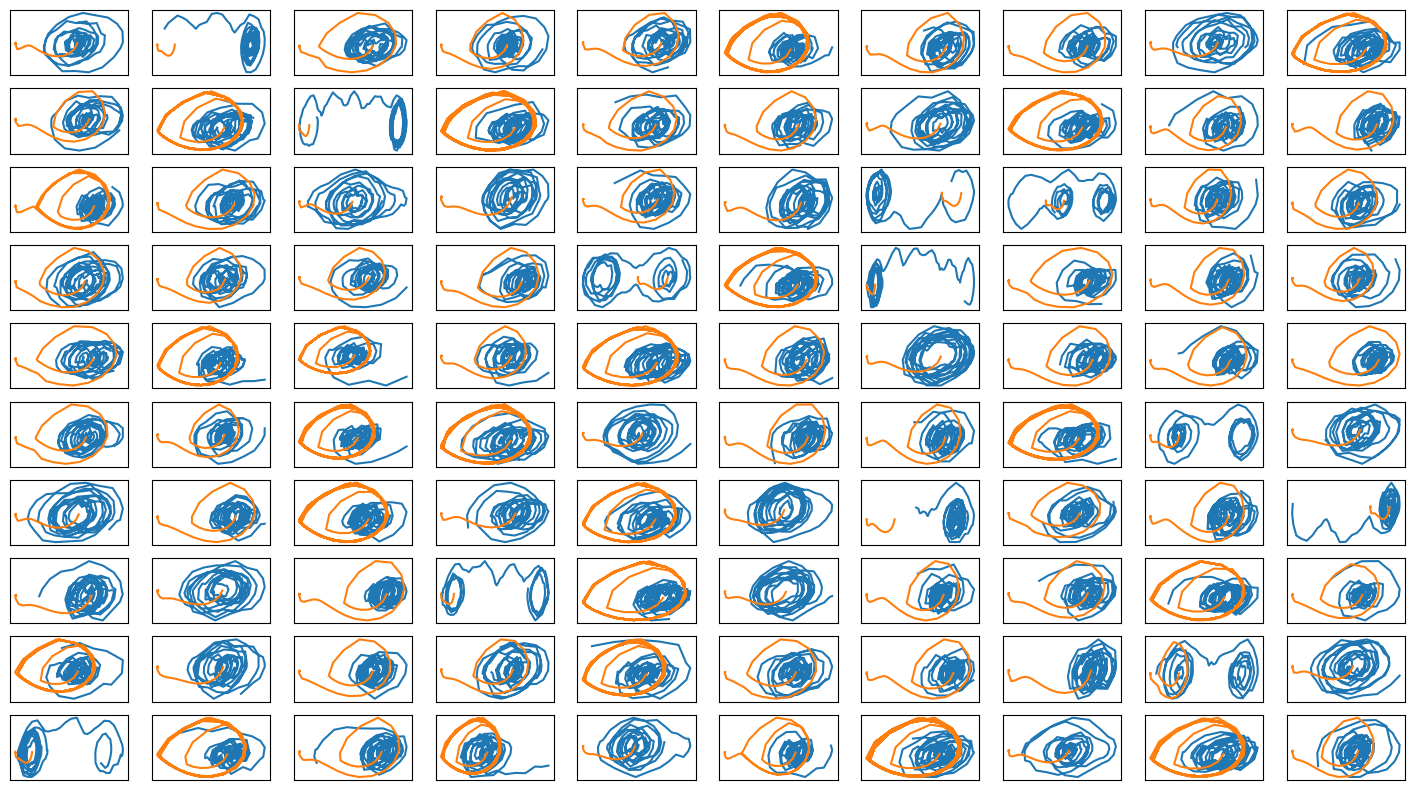

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 473.74970  validloss 608.76339±0.00000  bestvalidloss 608.76339  last_update 0
train: iter 1  trainloss 407.13365  validloss 411.81532±0.00000  bestvalidloss 411.81532  last_update 0
train: iter 2  trainloss 1223.85380  validloss 3276.57857±0.00000  bestvalidloss 411.81532  last_update 1
train: iter 3  trainloss 149.33994  validloss 236.48585±0.00000  bestvalidloss 236.48585  last_update 0
train: iter 4  trainloss 125.07558  validloss 326.74900±0.00000  bestvalidloss 236.48585  last_update 1
train: iter 5  trainloss 55.54912  validloss 86.14321±0.00000  bestvalidloss 86.14321  last_update 0
train: iter 6  trainloss 29.32982  validloss 32.18407±0.00000  bestvalidloss 32.18407  last_update 0
train: iter 7  trainloss 8.08361  validloss 8.20289±0.00000  bestvalidloss 8.20289  last_update 0
train: iter 8  trainloss -15.17913  validloss -8.33127±0.00000  bestvalidloss -8.33127  last_update 0
train: iter 9  trainloss -41.45844  validloss -31.33845±0

train: iter 77  trainloss -479.68499  validloss -376.29738±0.00000  bestvalidloss -620.61827  last_update 8
train: iter 78  trainloss -512.35823  validloss -529.76782±0.00000  bestvalidloss -620.61827  last_update 9
train: iter 79  trainloss -511.18408  validloss -539.41361±0.00000  bestvalidloss -620.61827  last_update 10
train: iter 80  trainloss -541.85342  validloss -393.12356±0.00000  bestvalidloss -620.61827  last_update 11
train: iter 81  trainloss -532.26333  validloss -574.13395±0.00000  bestvalidloss -620.61827  last_update 12
train: iter 82  trainloss -542.67952  validloss -546.00939±0.00000  bestvalidloss -620.61827  last_update 13
train: iter 83  trainloss -512.88623  validloss -501.87862±0.00000  bestvalidloss -620.61827  last_update 14
train: iter 84  trainloss -520.86551  validloss -588.43696±0.00000  bestvalidloss -620.61827  last_update 15
train: iter 85  trainloss -554.81643  validloss -561.11295±0.00000  bestvalidloss -620.61827  last_update 16
train: iter 86  train

train: iter 153  trainloss -635.60230  validloss -710.66318±0.00000  bestvalidloss -717.30230  last_update 14
train: iter 154  trainloss -635.69847  validloss -653.59234±0.00000  bestvalidloss -717.30230  last_update 15
train: iter 155  trainloss -636.36193  validloss -703.15833±0.00000  bestvalidloss -717.30230  last_update 16
train: iter 156  trainloss -652.02305  validloss -678.72377±0.00000  bestvalidloss -717.30230  last_update 17
train: iter 157  trainloss -657.35867  validloss -684.33499±0.00000  bestvalidloss -717.30230  last_update 18
train: iter 158  trainloss -663.87736  validloss -702.51831±0.00000  bestvalidloss -717.30230  last_update 19
train: iter 159  trainloss -634.93712  validloss -608.43876±0.00000  bestvalidloss -717.30230  last_update 20
train: iter 160  trainloss -647.07772  validloss -707.08254±0.00000  bestvalidloss -717.30230  last_update 21
train: iter 161  trainloss -645.13740  validloss -711.42491±0.00000  bestvalidloss -717.30230  last_update 22
train: ite

train: iter 228  trainloss -676.70888  validloss -708.70668±0.00000  bestvalidloss -745.26235  last_update 9
train: iter 229  trainloss -660.86297  validloss -499.99561±0.00000  bestvalidloss -745.26235  last_update 10
train: iter 230  trainloss -688.30286  validloss -704.59974±0.00000  bestvalidloss -745.26235  last_update 11
train: iter 231  trainloss -630.03559  validloss -722.99653±0.00000  bestvalidloss -745.26235  last_update 12
train: iter 232  trainloss -659.69262  validloss -629.69568±0.00000  bestvalidloss -745.26235  last_update 13
train: iter 233  trainloss -686.33561  validloss -612.13927±0.00000  bestvalidloss -745.26235  last_update 14
train: iter 234  trainloss -676.69526  validloss -735.89356±0.00000  bestvalidloss -745.26235  last_update 15
train: iter 235  trainloss -686.04614  validloss -682.35030±0.00000  bestvalidloss -745.26235  last_update 16
train: iter 236  trainloss -678.92569  validloss -735.86306±0.00000  bestvalidloss -745.26235  last_update 17
train: iter

train: iter 303  trainloss -711.14020  validloss -752.52293±0.00000  bestvalidloss -771.13703  last_update 39
train: iter 304  trainloss -708.56756  validloss -735.64213±0.00000  bestvalidloss -771.13703  last_update 40
train: iter 305  trainloss -697.89326  validloss -738.64274±0.00000  bestvalidloss -771.13703  last_update 41
train: iter 306  trainloss -688.04461  validloss -758.04308±0.00000  bestvalidloss -771.13703  last_update 42
train: iter 307  trainloss -687.26008  validloss -738.89099±0.00000  bestvalidloss -771.13703  last_update 43
train: iter 308  trainloss -698.74083  validloss -747.30956±0.00000  bestvalidloss -771.13703  last_update 44
train: iter 309  trainloss -693.35239  validloss -768.15830±0.00000  bestvalidloss -771.13703  last_update 45
train: iter 310  trainloss -713.34270  validloss -759.33502±0.00000  bestvalidloss -771.13703  last_update 46
train: iter 311  trainloss -649.74073  validloss -755.33176±0.00000  bestvalidloss -771.13703  last_update 47
train: ite

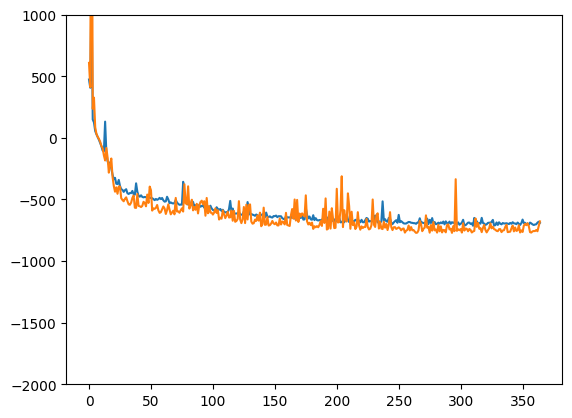

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


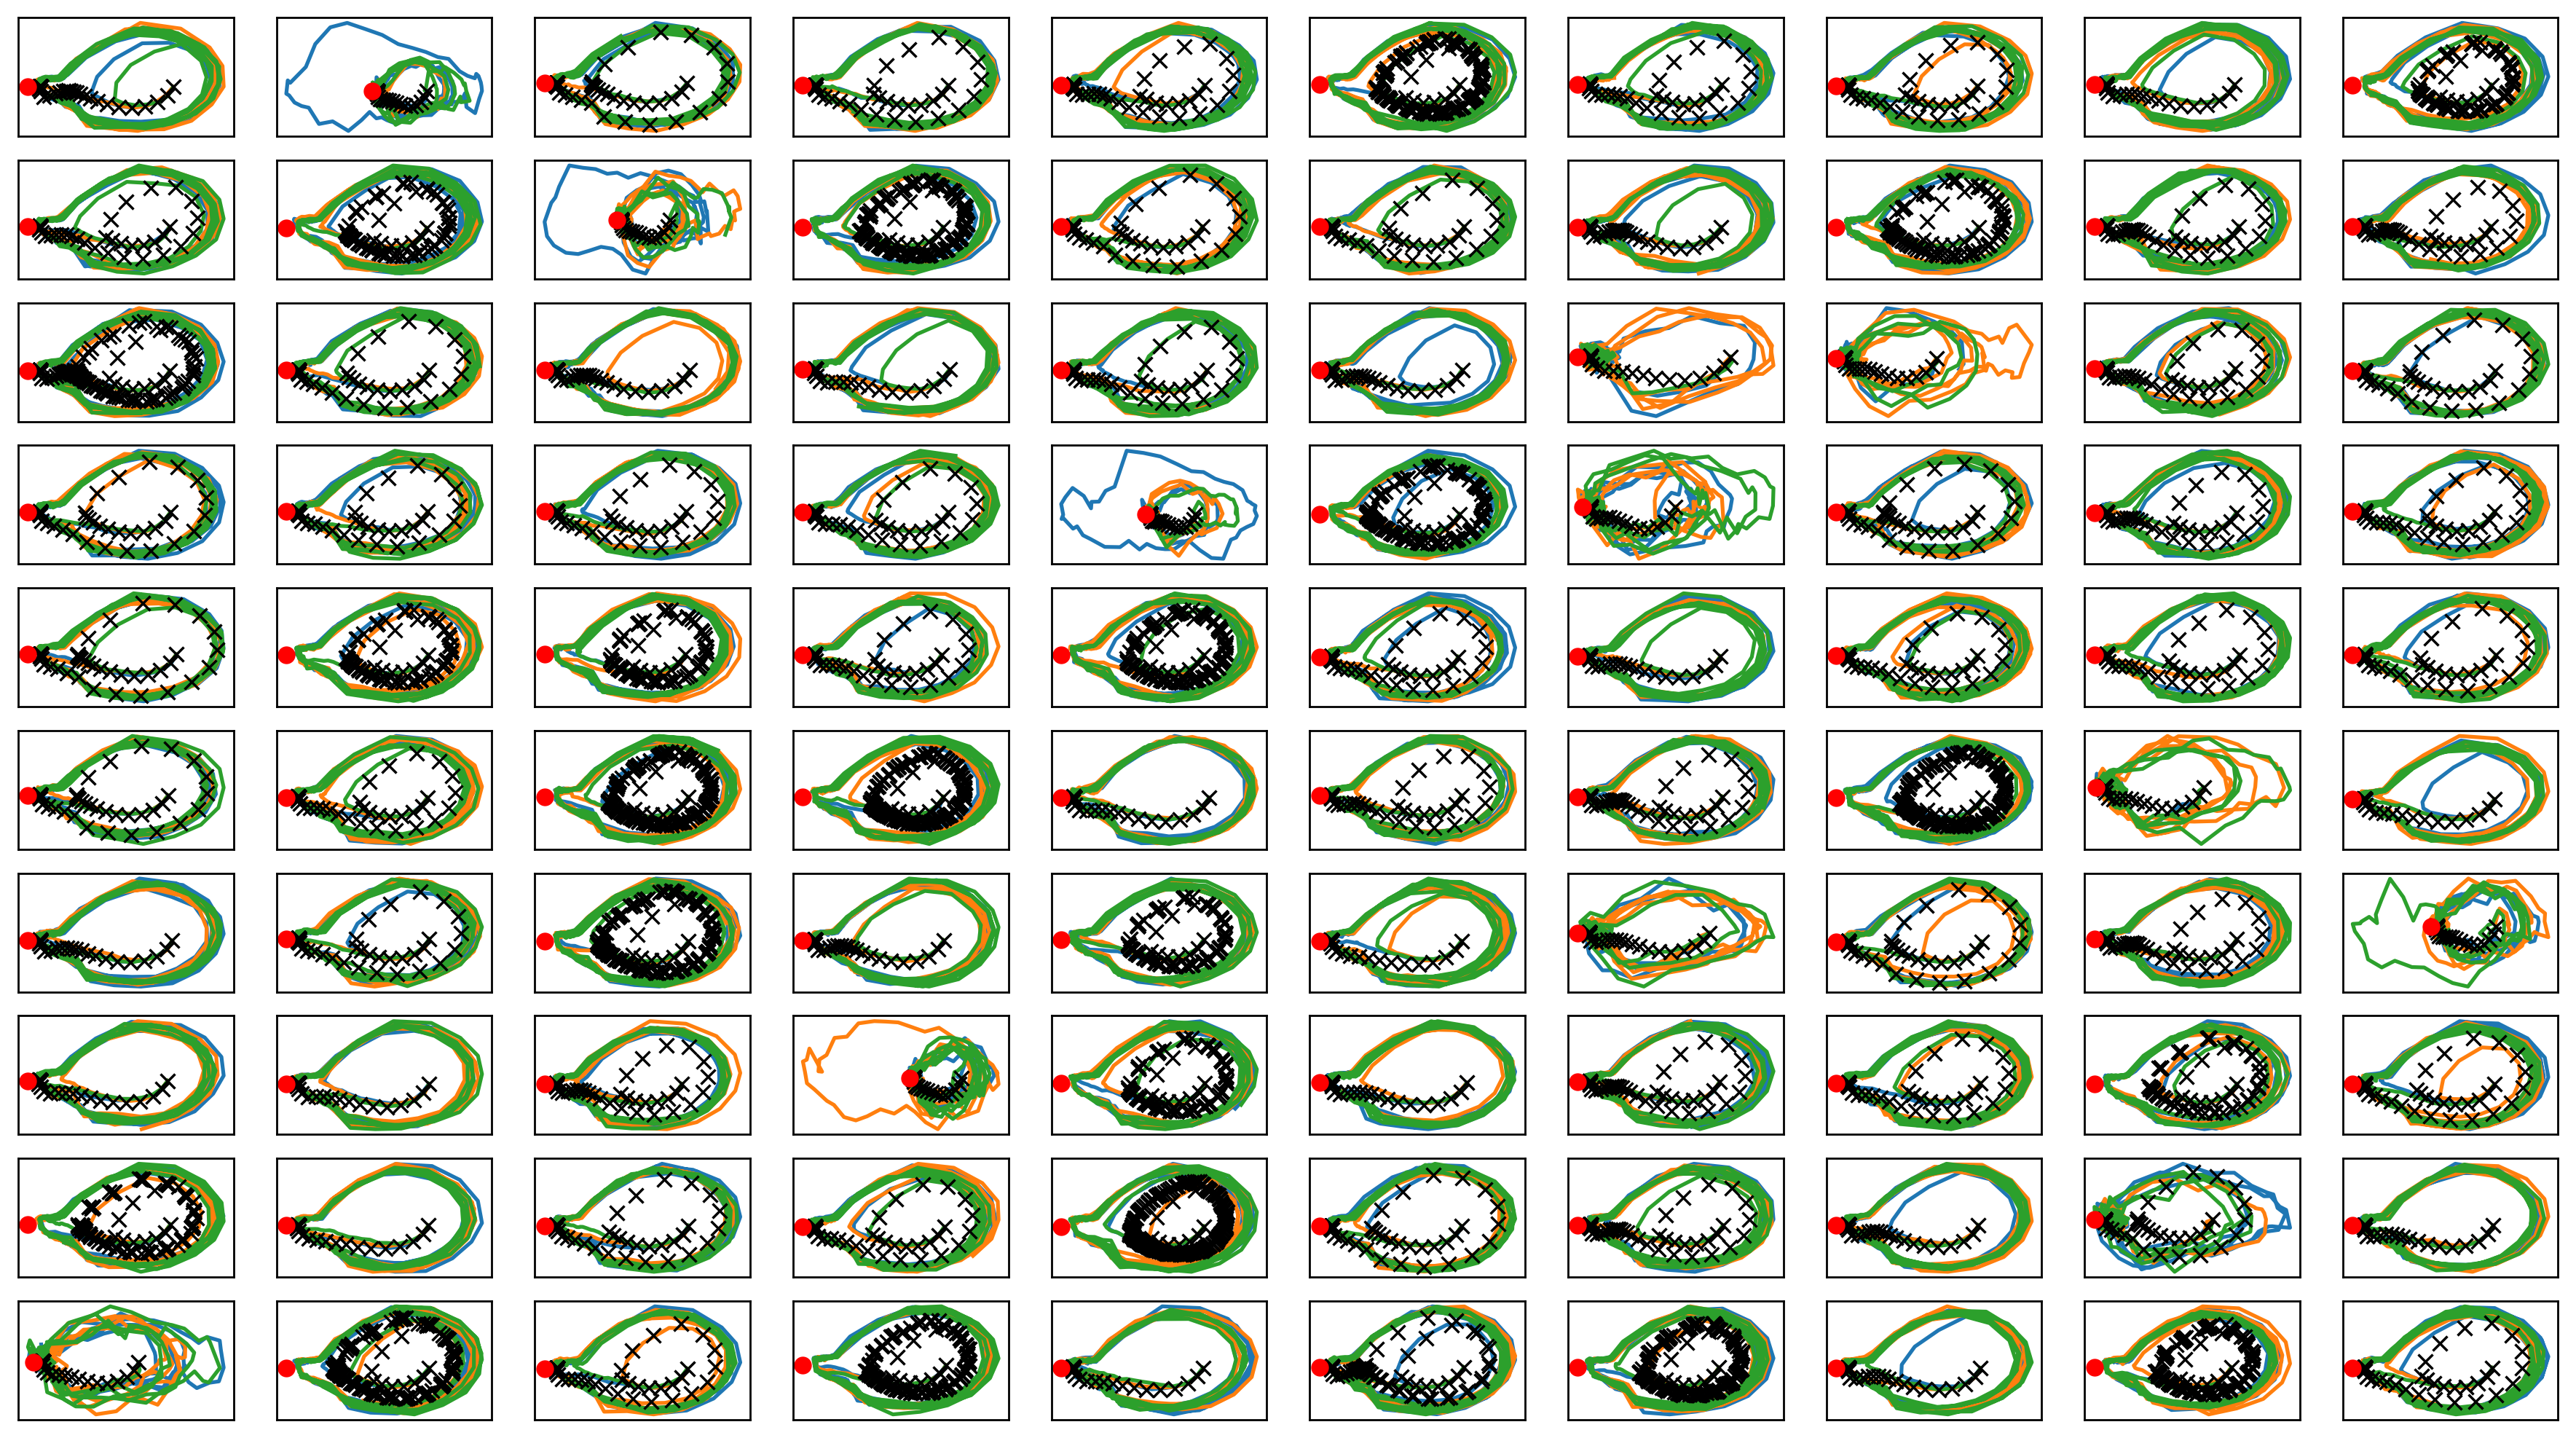

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

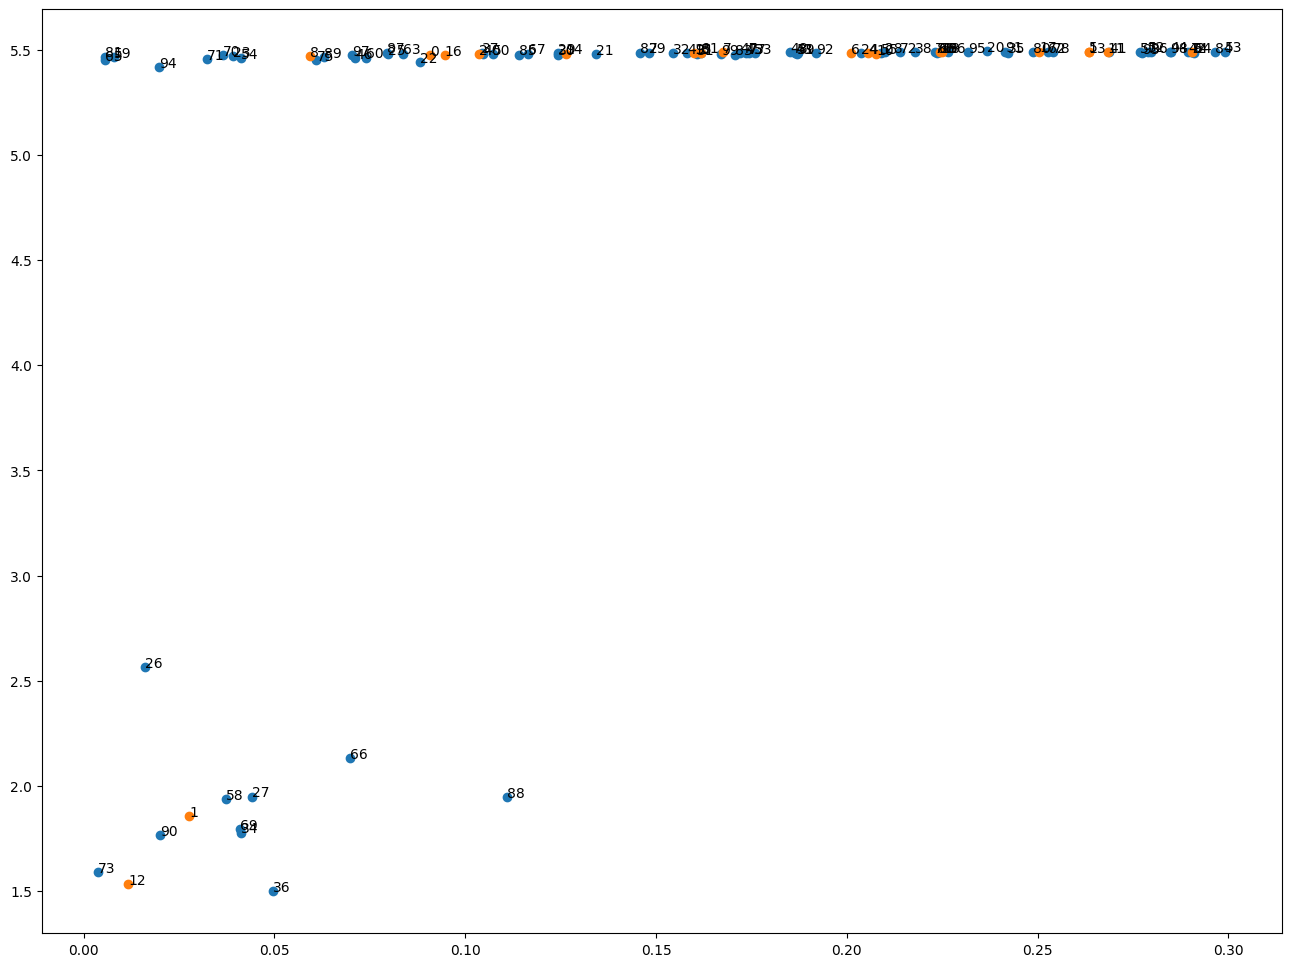

[0.09069977 0.02770158 0.10366822 0.16164502 0.20556585 0.26343523
 0.20114025 0.16760695 0.05943045 0.29047847 0.20769678 0.268382
 0.01171643 0.26344275 0.12633229 0.15994959 0.09465469 0.2503877
 0.22504329 0.2244497  0.2367838  0.13436806 0.08808424 0.03900857
 0.20365066 0.079664   0.01600876 0.04401857 0.20992751 0.1242168
 0.12425378 0.16076892 0.15446673 0.17596651 0.04124241 0.24221739
 0.04960626 0.10432976 0.2177994  0.18710166 0.1046695  0.26876587
 0.28945201 0.18650872 0.28484678 0.17351688 0.07110809 0.17210385
 0.18514347 0.15811743 0.10718093 0.18700803 0.27883117 0.29919686
 0.04114072 0.20904545 0.22663892 0.27690736 0.03728129 0.0078633
 0.07386332 0.16164932 0.25260927 0.0837551  0.29087872 0.00559419
 0.06989228 0.11635819 0.22413649 0.04093657 0.03640304 0.03224824
 0.21389669 0.00376679 0.2901829  0.06098797 0.22314776 0.17440768
 0.25404864 0.14813091 0.24869427 0.00557286 0.14590353 0.17065543
 0.29658485 0.11404235 0.22360033 0.07947587 0.11102526 0.0630522
 

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


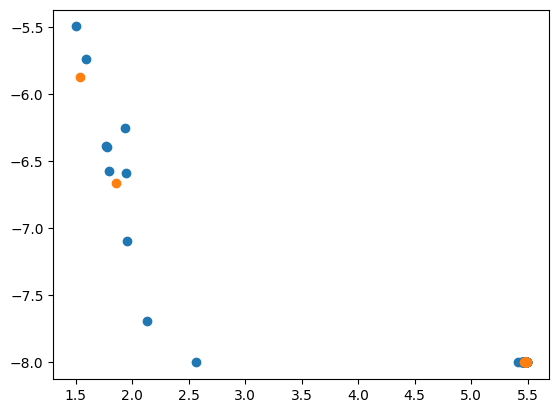

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 13.63030  validloss 14.61632±0.00000  bestvalidloss 14.61632  last_update 0
train: iter 1  trainloss 12.46309  validloss 13.25178±0.00000  bestvalidloss 13.25178  last_update 0
train: iter 2  trainloss 11.44525  validloss 12.19452±0.00000  bestvalidloss 12.19452  last_update 0
train: iter 3  trainloss 10.52687  validloss 11.18094±0.00000  bestvalidloss 11.18094  last_update 0
train: iter 4  trainloss 9.76779  validloss 10.35402±0.00000  bestvalidloss 10.35402  last_update 0
train: iter 5  trainloss 9.08199  validloss 9.60260±0.00000  bestvalidloss 9.60260  last_update 0
train: iter 6  trainloss 8.47928  validloss 8.94005±0.00000  bestvalidloss 8.94005  last_update 0
train: iter 7  trainloss 7.95551  validloss 8.34971±0.00000  bestvalidloss 8.34971  last_update 0
train: iter 8  trainloss 7.46702  validloss 7.86528±0.00000  bestvalidloss 7.86528  last_update 0
train: iter 9  trainloss 7.04578  validloss 7.37832±0.00000  bestvalidloss 7.37832  last_update 0
train:

train: iter 87  trainloss 1.92277  validloss 1.93568±0.00000  bestvalidloss 1.93568  last_update 0
train: iter 88  trainloss 1.90444  validloss 1.91774±0.00000  bestvalidloss 1.91774  last_update 0
train: iter 89  trainloss 1.88508  validloss 1.89915±0.00000  bestvalidloss 1.89915  last_update 0
train: iter 90  trainloss 1.86659  validloss 1.87967±0.00000  bestvalidloss 1.87967  last_update 0
train: iter 91  trainloss 1.84659  validloss 1.85900±0.00000  bestvalidloss 1.85900  last_update 0
train: iter 92  trainloss 1.82880  validloss 1.84217±0.00000  bestvalidloss 1.84217  last_update 0
train: iter 93  trainloss 1.81049  validloss 1.82603±0.00000  bestvalidloss 1.82603  last_update 0
train: iter 94  trainloss 1.79119  validloss 1.79902±0.00000  bestvalidloss 1.79902  last_update 0
train: iter 95  trainloss 1.77269  validloss 1.77930±0.00000  bestvalidloss 1.77930  last_update 0
train: iter 96  trainloss 1.75740  validloss 1.76287±0.00000  bestvalidloss 1.76287  last_update 0
train: ite

train: iter 175  trainloss 1.59580  validloss 1.56206±0.00000  bestvalidloss 1.53913  last_update 7
train: iter 176  trainloss 1.58884  validloss 1.55197±0.00000  bestvalidloss 1.53913  last_update 8
train: iter 177  trainloss 1.59497  validloss 1.54689±0.00000  bestvalidloss 1.53913  last_update 9
train: iter 178  trainloss 1.59129  validloss 1.55862±0.00000  bestvalidloss 1.53913  last_update 10
train: iter 179  trainloss 1.59611  validloss 1.55122±0.00000  bestvalidloss 1.53913  last_update 11
train: iter 180  trainloss 1.58707  validloss 1.53775±0.00000  bestvalidloss 1.53775  last_update 0
train: iter 181  trainloss 1.58940  validloss 1.54370±0.00000  bestvalidloss 1.53775  last_update 1
train: iter 182  trainloss 1.59114  validloss 1.55468±0.00000  bestvalidloss 1.53775  last_update 2
train: iter 183  trainloss 1.59550  validloss 1.54355±0.00000  bestvalidloss 1.53775  last_update 3
train: iter 184  trainloss 1.60103  validloss 1.55597±0.00000  bestvalidloss 1.53775  last_update 

train: iter 257  trainloss 1.59112  validloss 1.55285±0.00000  bestvalidloss 1.53702  last_update 12
train: iter 258  trainloss 1.59232  validloss 1.56854±0.00000  bestvalidloss 1.53702  last_update 13
train: iter 259  trainloss 1.59482  validloss 1.55673±0.00000  bestvalidloss 1.53702  last_update 14
train: iter 260  trainloss 1.59943  validloss 1.54748±0.00000  bestvalidloss 1.53702  last_update 15
train: iter 261  trainloss 1.59917  validloss 1.54942±0.00000  bestvalidloss 1.53702  last_update 16
train: iter 262  trainloss 1.59262  validloss 1.54527±0.00000  bestvalidloss 1.53702  last_update 17
train: iter 263  trainloss 1.59349  validloss 1.55510±0.00000  bestvalidloss 1.53702  last_update 18
train: iter 264  trainloss 1.59326  validloss 1.55793±0.00000  bestvalidloss 1.53702  last_update 19
train: iter 265  trainloss 1.59140  validloss 1.54665±0.00000  bestvalidloss 1.53702  last_update 20
train: iter 266  trainloss 1.59145  validloss 1.57484±0.00000  bestvalidloss 1.53702  last_

train: iter 343  trainloss 1.59706  validloss 1.54960±0.00000  bestvalidloss 1.53321  last_update 5
train: iter 344  trainloss 1.58647  validloss 1.53661±0.00000  bestvalidloss 1.53321  last_update 6
train: iter 345  trainloss 1.59506  validloss 1.55339±0.00000  bestvalidloss 1.53321  last_update 7
train: iter 346  trainloss 1.59394  validloss 1.54080±0.00000  bestvalidloss 1.53321  last_update 8
train: iter 347  trainloss 1.59624  validloss 1.55547±0.00000  bestvalidloss 1.53321  last_update 9
train: iter 348  trainloss 1.59421  validloss 1.54994±0.00000  bestvalidloss 1.53321  last_update 10
train: iter 349  trainloss 1.59012  validloss 1.55757±0.00000  bestvalidloss 1.53321  last_update 11
train: iter 350  trainloss 1.59344  validloss 1.55318±0.00000  bestvalidloss 1.53321  last_update 12
train: iter 351  trainloss 1.59539  validloss 1.56242±0.00000  bestvalidloss 1.53321  last_update 13
train: iter 352  trainloss 1.59123  validloss 1.54882±0.00000  bestvalidloss 1.53321  last_updat

train: iter 431  trainloss 1.59252  validloss 1.55824±0.00000  bestvalidloss 1.52989  last_update 52
train: iter 432  trainloss 1.59104  validloss 1.54712±0.00000  bestvalidloss 1.52989  last_update 53
train: iter 433  trainloss 1.59759  validloss 1.55845±0.00000  bestvalidloss 1.52989  last_update 54
train: iter 434  trainloss 1.59214  validloss 1.56340±0.00000  bestvalidloss 1.52989  last_update 55
train: iter 435  trainloss 1.59248  validloss 1.54217±0.00000  bestvalidloss 1.52989  last_update 56
train: iter 436  trainloss 1.59464  validloss 1.54852±0.00000  bestvalidloss 1.52989  last_update 57
train: iter 437  trainloss 1.59513  validloss 1.53678±0.00000  bestvalidloss 1.52989  last_update 58
train: iter 438  trainloss 1.59850  validloss 1.54802±0.00000  bestvalidloss 1.52989  last_update 59
train: iter 439  trainloss 1.58919  validloss 1.53226±0.00000  bestvalidloss 1.52989  last_update 60
train: iter 440  trainloss 1.59274  validloss 1.54965±0.00000  bestvalidloss 1.52989  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([5.0337, 0.3460], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 12.57552  validloss 17.52746±0.00000  bestvalidloss 17.52746  last_update 0
train: iter 1  trainloss 6.82404  validloss 8.84472±0.00000  bestvalidloss 8.84472  last_update 0
train: iter 2  trainloss 4.72096  validloss 4.28225±0.00000  bestvalidloss 4.28225  last_update 0
train: iter 3  trainloss 4.06528  validloss 2.64365±0.00000  bestvalidloss 2.64365  last_update 0
train: iter 4  trainloss 3.62036  validloss 1.85781±0.00000  bestvalidloss 1.85781  last_update 0
train: iter 5  trainloss 3.44290  validloss 1.55902±0.00000  bestvalidloss 1.55902  last_update 0
train: iter 6  trainloss 3.31207  validloss 1.34659±0.00000  bestvalidloss 1.34659  last_update 0
train: iter 7  trainloss 3.13259  validloss 1.40015±0.00000  bestvalidloss 1.34659  last_update 1
train: iter 8  trainloss 3.08883  validloss 1.31688±0.00000  bestvalidloss 1.31688  last_update 0
train: iter 9  trainloss 3.00305  validloss 1.30665±0.00000  bestvalidloss 1.30665  last_update 0
train: iter 10  t

train: iter 83  trainloss 1.86832  validloss 0.75138±0.00000  bestvalidloss 0.73240  last_update 30
train: iter 84  trainloss 1.96324  validloss 0.85825±0.00000  bestvalidloss 0.73240  last_update 31
train: iter 85  trainloss 1.93168  validloss 0.83985±0.00000  bestvalidloss 0.73240  last_update 32
train: iter 86  trainloss 1.94258  validloss 0.77322±0.00000  bestvalidloss 0.73240  last_update 33
train: iter 87  trainloss 1.86232  validloss 0.81992±0.00000  bestvalidloss 0.73240  last_update 34
train: iter 88  trainloss 1.92400  validloss 0.76579±0.00000  bestvalidloss 0.73240  last_update 35
train: iter 89  trainloss 1.93091  validloss 0.76623±0.00000  bestvalidloss 0.73240  last_update 36
train: iter 90  trainloss 1.92116  validloss 0.77556±0.00000  bestvalidloss 0.73240  last_update 37
train: iter 91  trainloss 1.90292  validloss 0.87318±0.00000  bestvalidloss 0.73240  last_update 38
train: iter 92  trainloss 1.90651  validloss 0.77118±0.00000  bestvalidloss 0.73240  last_update 39


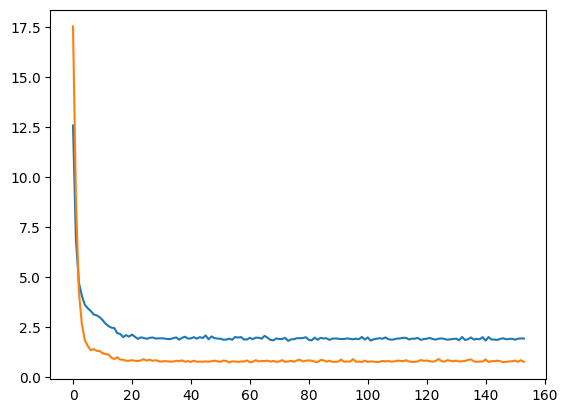

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(5.3797)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-0.0450)


In [21]:
print(vi.h_min_tilde)

-5.4867


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.9657773396355538
tensor([-0.5049])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

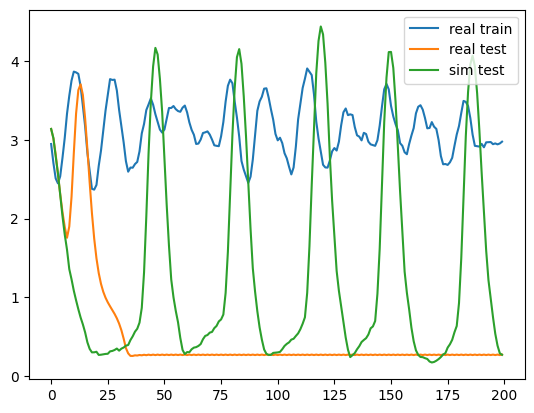

encoder [ 5.487844 -8.      ]
initial_belief tensor([5.0337, 0.3460])
real train tensor([ 5.4943, -8.0069])
real test tensor([ 1.9497, -6.5924])
sim tensor([ 5.5024, -8.0165])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


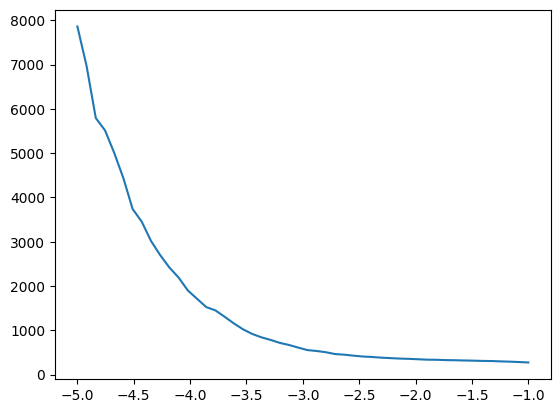

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.28125752092688
tensor([1.8478])
